Simulate single lead

In [3]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 9]

# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=360)

# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=360)

# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

In [4]:
valid_indices = rpeaks[rpeaks < len(cleaned_ecg)]
r_peak_amplitudes = cleaned_ecg[valid_indices]

print(r_peak_amplitudes)

313      1.026790
620      0.811602
928      0.857565
1241     0.862394
1549     0.837886
1850     0.824855
2150     0.838800
2458     0.855240
2772     0.880947
3084     0.851184
3390     0.839353
3699     0.846510
4011     0.857785
4321     0.849124
4628     0.852625
4934     0.851210
5243     0.861430
5553     0.855347
5862     0.857770
6171     0.845961
6480     0.852137
6785     0.838145
7089     0.835128
7397     0.863069
7709     0.850543
8018     0.845628
8324     0.853888
8634     0.867113
8951     0.871256
9266     0.869297
9570     0.817763
9872     0.828805
10179    0.907196
10489    0.710934
Name: ECG_Clean, dtype: float64


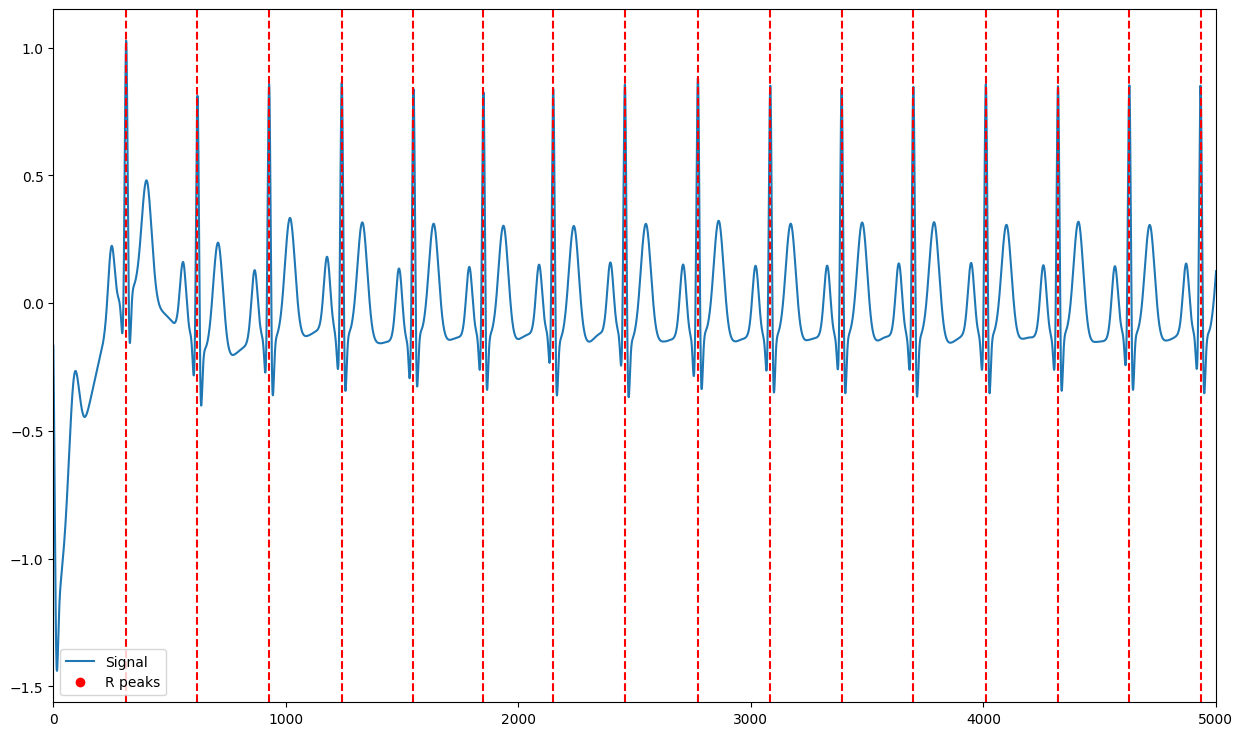

In [5]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)

plt.xlim(0, 5000)
plt.plot([], [], 'ro', label="R peaks")
plt.legend() 
plt.show()

Text(0.5, 1.0, 'Gráfica TPQS')

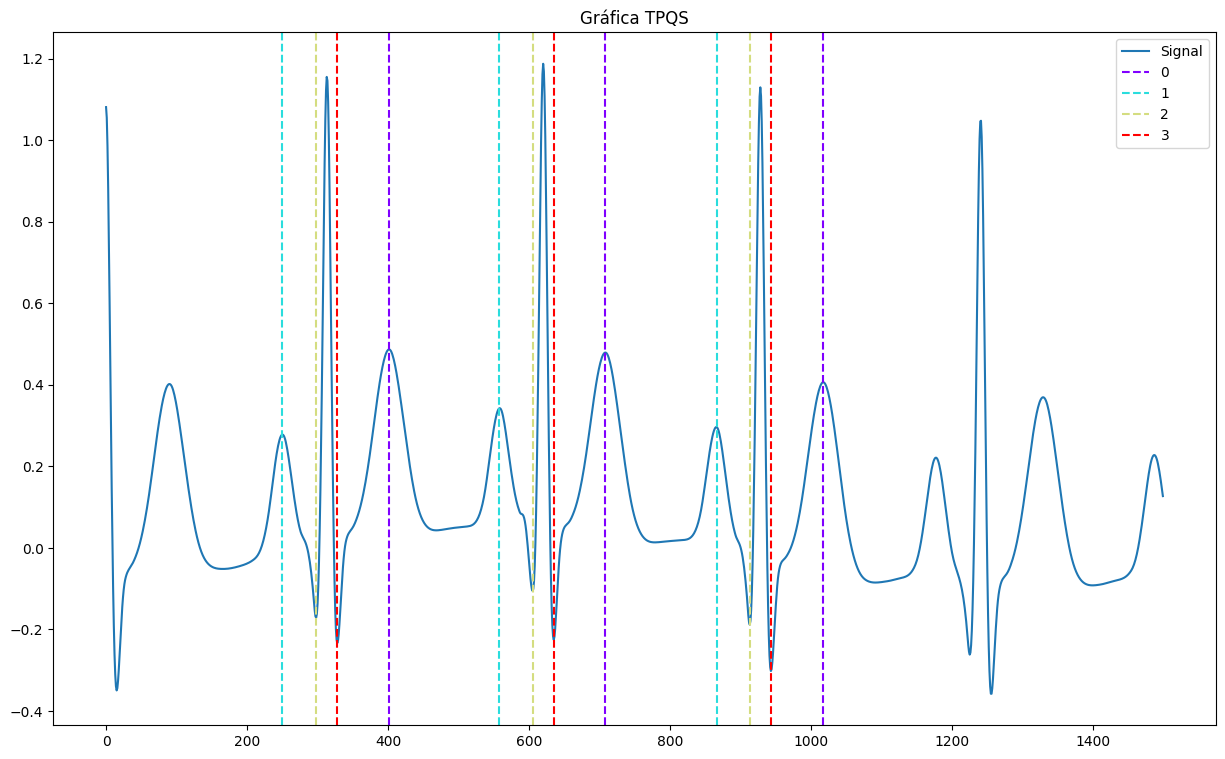

In [19]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=360, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:1500])

plt.title("Gráfica TPQS")
#plt.savefig("GráficaTPQS.png")
#plt.close()

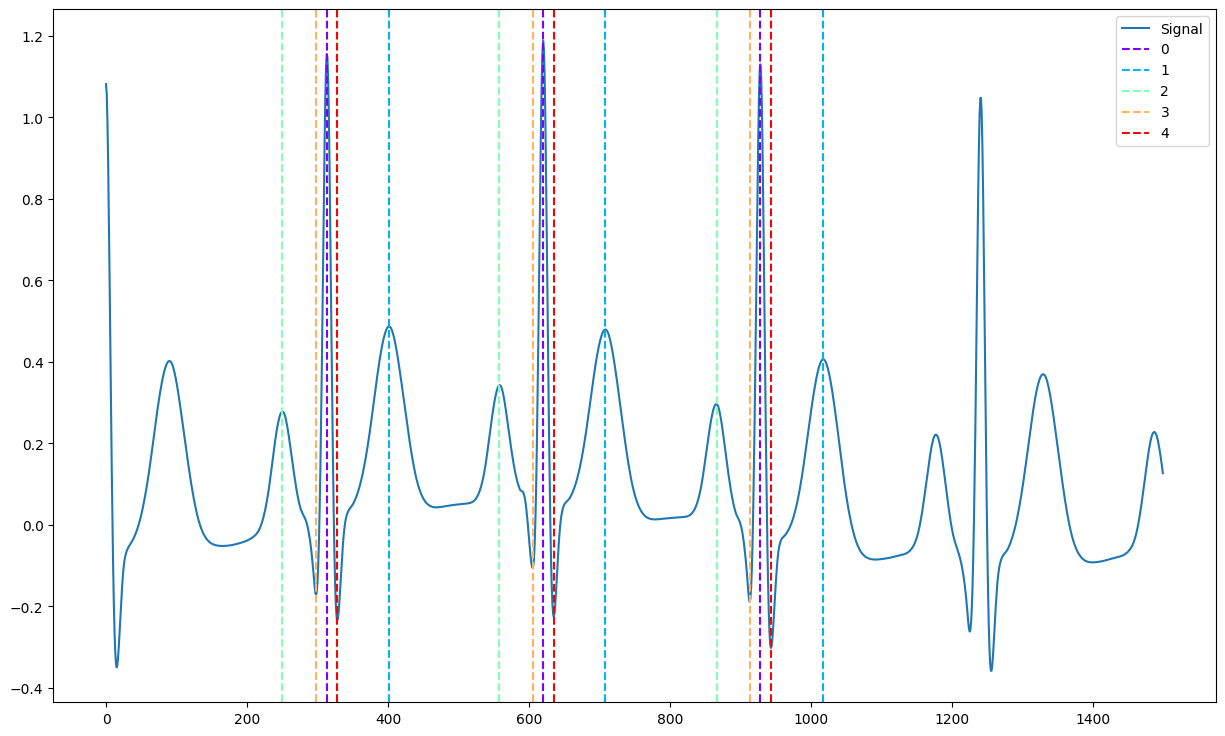

In [18]:
plot = nk.events_plot([rpeaks[:3],
                       waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:1500])

In [7]:
# Store the peaks
t_peaks = waves_peak['ECG_T_Peaks']
p_peaks = waves_peak['ECG_P_Peaks']
q_peaks = waves_peak['ECG_Q_Peaks']
s_peaks = waves_peak['ECG_S_Peaks']

# Remove nan values from peak lists before indexing
t_peaks = [x for x in t_peaks if not np.isnan(x)]
p_peaks = [x for x in p_peaks if not np.isnan(x)]
q_peaks = [x for x in q_peaks if not np.isnan(x)]
s_peaks = [x for x in s_peaks if not np.isnan(x)]

# Convert peak lists to integers for indexing
t_peaks = [int(x) for x in t_peaks]
p_peaks = [int(x) for x in p_peaks]
q_peaks = [int(x) for x in q_peaks]
s_peaks = [int(x) for x in s_peaks]

# Get the amplitudes of the different waves
t_peak_amplitudes = cleaned_ecg[t_peaks]
p_peak_amplitudes = cleaned_ecg[p_peaks]
q_peak_amplitudes = cleaned_ecg[q_peaks]
s_peak_amplitudes = cleaned_ecg[s_peaks]


In [8]:
# Calculate intervals (in seconds)
sampling_rate = 360  # Your sampling rate

# QRS interval
qrs_intervals = [(s_peaks[i] - q_peaks[i]) / sampling_rate for i in range(min(len(q_peaks), len(s_peaks)))]

# PQ interval
pq_intervals = [(q_peaks[i] - p_peaks[i]) / sampling_rate for i in range(min(len(p_peaks), len(q_peaks)))]

# QT interval
qt_intervals = [(t_peaks[i] - q_peaks[i]) / sampling_rate for i in range(min(len(q_peaks), len(t_peaks)))]

# ST interval
st_intervals = [(t_peaks[i] - s_peaks[i]) / sampling_rate for i in range(min(len(s_peaks), len(t_peaks)))]


In [9]:
# Store the R-peaks
r_peaks = info["ECG_R_Peaks"]

# Remove nan values from peak lists and convert to integers
def clean_peaks(peaks):
    peaks = [x for x in peaks if not np.isnan(x)]
    peaks = [int(x) for x in peaks]
    return peaks

# Remove nan values and convert to integers
r_peaks = clean_peaks(r_peaks)

# Calculate RR intervals (in seconds)
sampling_rate = 360  # Your sampling rate
rr_intervals = [(r_peaks[i + 1] - r_peaks[i]) / sampling_rate for i in range(len(r_peaks) - 1)]


# Print the RR intervals for each heartbeat
for i, interval in enumerate(rr_intervals):
    print(f"Heartbeat {i + 1}: RR interval = {interval:.3f} seconds")

Heartbeat 1: RR interval = 0.853 seconds
Heartbeat 2: RR interval = 0.856 seconds
Heartbeat 3: RR interval = 0.869 seconds
Heartbeat 4: RR interval = 0.856 seconds
Heartbeat 5: RR interval = 0.836 seconds
Heartbeat 6: RR interval = 0.833 seconds
Heartbeat 7: RR interval = 0.856 seconds
Heartbeat 8: RR interval = 0.872 seconds
Heartbeat 9: RR interval = 0.867 seconds
Heartbeat 10: RR interval = 0.850 seconds
Heartbeat 11: RR interval = 0.858 seconds
Heartbeat 12: RR interval = 0.867 seconds
Heartbeat 13: RR interval = 0.861 seconds
Heartbeat 14: RR interval = 0.853 seconds
Heartbeat 15: RR interval = 0.850 seconds
Heartbeat 16: RR interval = 0.858 seconds
Heartbeat 17: RR interval = 0.861 seconds
Heartbeat 18: RR interval = 0.858 seconds
Heartbeat 19: RR interval = 0.858 seconds
Heartbeat 20: RR interval = 0.858 seconds
Heartbeat 21: RR interval = 0.847 seconds
Heartbeat 22: RR interval = 0.844 seconds
Heartbeat 23: RR interval = 0.856 seconds
Heartbeat 24: RR interval = 0.867 seconds
H

In [10]:
# Print the QRS interval for each heartbeat
for i, interval in enumerate(qrs_intervals):
    print(f"Heartbeat {i + 1}: QRS interval = {interval:.3f} seconds")

Heartbeat 1: QRS interval = 0.083 seconds
Heartbeat 2: QRS interval = 0.083 seconds
Heartbeat 3: QRS interval = 0.083 seconds
Heartbeat 4: QRS interval = 0.086 seconds
Heartbeat 5: QRS interval = 0.086 seconds
Heartbeat 6: QRS interval = 0.083 seconds
Heartbeat 7: QRS interval = 0.083 seconds
Heartbeat 8: QRS interval = 0.086 seconds
Heartbeat 9: QRS interval = 0.089 seconds
Heartbeat 10: QRS interval = 0.086 seconds
Heartbeat 11: QRS interval = 0.086 seconds
Heartbeat 12: QRS interval = 0.083 seconds
Heartbeat 13: QRS interval = 0.086 seconds
Heartbeat 14: QRS interval = 0.083 seconds
Heartbeat 15: QRS interval = 0.083 seconds
Heartbeat 16: QRS interval = 0.083 seconds
Heartbeat 17: QRS interval = 0.083 seconds
Heartbeat 18: QRS interval = 0.086 seconds
Heartbeat 19: QRS interval = 0.083 seconds
Heartbeat 20: QRS interval = 0.086 seconds
Heartbeat 21: QRS interval = 0.083 seconds
Heartbeat 22: QRS interval = 0.083 seconds
Heartbeat 23: QRS interval = 0.083 seconds
Heartbeat 24: QRS in

In [11]:
# Print the PQ interval for each heartbeat
for i, interval in enumerate(pq_intervals):
    print(f"Heartbeat {i + 1}: PQ interval = {interval:.3f} seconds")

Heartbeat 1: PQ interval = 0.133 seconds
Heartbeat 2: PQ interval = 0.131 seconds
Heartbeat 3: PQ interval = 0.131 seconds
Heartbeat 4: PQ interval = 0.133 seconds
Heartbeat 5: PQ interval = 0.128 seconds
Heartbeat 6: PQ interval = 0.128 seconds
Heartbeat 7: PQ interval = 0.128 seconds
Heartbeat 8: PQ interval = 0.131 seconds
Heartbeat 9: PQ interval = 0.128 seconds
Heartbeat 10: PQ interval = 0.133 seconds
Heartbeat 11: PQ interval = 0.131 seconds
Heartbeat 12: PQ interval = 0.133 seconds
Heartbeat 13: PQ interval = 0.133 seconds
Heartbeat 14: PQ interval = 0.133 seconds
Heartbeat 15: PQ interval = 0.131 seconds
Heartbeat 16: PQ interval = 0.131 seconds
Heartbeat 17: PQ interval = 0.133 seconds
Heartbeat 18: PQ interval = 0.131 seconds
Heartbeat 19: PQ interval = 0.133 seconds
Heartbeat 20: PQ interval = 0.131 seconds
Heartbeat 21: PQ interval = 0.131 seconds
Heartbeat 22: PQ interval = 0.131 seconds
Heartbeat 23: PQ interval = 0.131 seconds
Heartbeat 24: PQ interval = 0.131 seconds
H

In [12]:
# Print the QT interval for each heartbeat
for i, interval in enumerate(qt_intervals):
    print(f"Heartbeat {i + 1}: QT interval = {interval:.3f} seconds")

Heartbeat 1: QT interval = 0.286 seconds
Heartbeat 2: QT interval = 0.286 seconds
Heartbeat 3: QT interval = 0.289 seconds
Heartbeat 4: QT interval = 0.289 seconds
Heartbeat 5: QT interval = 0.286 seconds
Heartbeat 6: QT interval = 0.281 seconds
Heartbeat 7: QT interval = 0.286 seconds
Heartbeat 8: QT interval = 0.292 seconds
Heartbeat 9: QT interval = 0.297 seconds
Heartbeat 10: QT interval = 0.289 seconds
Heartbeat 11: QT interval = 0.289 seconds
Heartbeat 12: QT interval = 0.289 seconds
Heartbeat 13: QT interval = 0.289 seconds
Heartbeat 14: QT interval = 0.286 seconds
Heartbeat 15: QT interval = 0.286 seconds
Heartbeat 16: QT interval = 0.289 seconds
Heartbeat 17: QT interval = 0.289 seconds
Heartbeat 18: QT interval = 0.289 seconds
Heartbeat 19: QT interval = 0.289 seconds
Heartbeat 20: QT interval = 0.289 seconds
Heartbeat 21: QT interval = 0.283 seconds
Heartbeat 22: QT interval = 0.283 seconds
Heartbeat 23: QT interval = 0.289 seconds
Heartbeat 24: QT interval = 0.292 seconds
H

In [13]:
# Print the ST interval for each heartbeat
for i, interval in enumerate(st_intervals):
    print(f"Heartbeat {i + 1}: ST interval = {interval:.3f} seconds")

Heartbeat 1: ST interval = 0.203 seconds
Heartbeat 2: ST interval = 0.203 seconds
Heartbeat 3: ST interval = 0.206 seconds
Heartbeat 4: ST interval = 0.203 seconds
Heartbeat 5: ST interval = 0.200 seconds
Heartbeat 6: ST interval = 0.197 seconds
Heartbeat 7: ST interval = 0.203 seconds
Heartbeat 8: ST interval = 0.206 seconds
Heartbeat 9: ST interval = 0.208 seconds
Heartbeat 10: ST interval = 0.203 seconds
Heartbeat 11: ST interval = 0.203 seconds
Heartbeat 12: ST interval = 0.206 seconds
Heartbeat 13: ST interval = 0.203 seconds
Heartbeat 14: ST interval = 0.203 seconds
Heartbeat 15: ST interval = 0.203 seconds
Heartbeat 16: ST interval = 0.206 seconds
Heartbeat 17: ST interval = 0.206 seconds
Heartbeat 18: ST interval = 0.203 seconds
Heartbeat 19: ST interval = 0.206 seconds
Heartbeat 20: ST interval = 0.203 seconds
Heartbeat 21: ST interval = 0.200 seconds
Heartbeat 22: ST interval = 0.200 seconds
Heartbeat 23: ST interval = 0.206 seconds
Heartbeat 24: ST interval = 0.206 seconds
H

In [14]:
# Calculate time between first R-peak and start of signal
time_to_first_r_peak = r_peaks[0] / sampling_rate  # Time in seconds

# Print the time to the first R-peak
print(f"Time to first R-peak: {time_to_first_r_peak:.3f} seconds")

Time to first R-peak: 0.869 seconds


In [15]:
import pandas as pd

# Create a list of dictionaries to store the data
data = []
for i in range(len(rr_intervals)):
    data.append({
        "Pre-RR": time_to_first_r_peak if i == 0 else rr_intervals[i - 1],  # Use time_to_first_r_peak for the first row
        "Post-RR": rr_intervals[i],
        "P-peak": p_peak_amplitudes.iloc[i] if i < len(p_peak_amplitudes) else None,  # Handle cases where peak lists have different lengths
        "T-Peak": t_peak_amplitudes.iloc[i] if i < len(t_peak_amplitudes) else None,
        "R-Peak": r_peak_amplitudes.iloc[i] if i < len(r_peak_amplitudes) else None,
        "S-Peak": s_peak_amplitudes.iloc[i] if i < len(s_peak_amplitudes) else None,
        "Q-Peak": q_peak_amplitudes.iloc[i] if i < len(q_peak_amplitudes) else None,
        "QRS-interval": qrs_intervals[i] if i < len(qrs_intervals) else None,
        "PQ-Interval": pq_intervals[i] if i < len(pq_intervals) else None,
        "QT-Interval": qt_intervals[i] if i < len(qt_intervals) else None,
        "ST-Interval": st_intervals[i] if i < len(st_intervals) else None,
    })


# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Export the DataFrame to a CSV file
df.to_csv("ecg_data_test1.csv", index=False)  # Set index=False to avoid writing row numbers

---

It just works!!!!

---

In [28]:
print(p_peak_amplitudes)

251      0.233302
563      0.149561
868      0.113492
1172     0.173889
1481     0.147007
1795     0.155056
2103     0.148851
2406     0.157091
2714     0.157101
3030     0.154712
3345     0.141648
3652     0.145434
3955     0.149125
4261     0.153992
4571     0.148316
4876     0.141058
5178     0.150260
5484     0.162545
5798     0.149275
6114     0.148241
6426     0.149746
6735     0.152658
7044     0.149939
7352     0.144850
7657     0.148959
7962     0.150931
8267     0.148141
8574     0.152738
8881     0.145938
9192     0.155517
9506     0.151988
9818     0.141120
10125    0.177544
Name: ECG_Clean, dtype: float64


---

Correcto hasta aquí

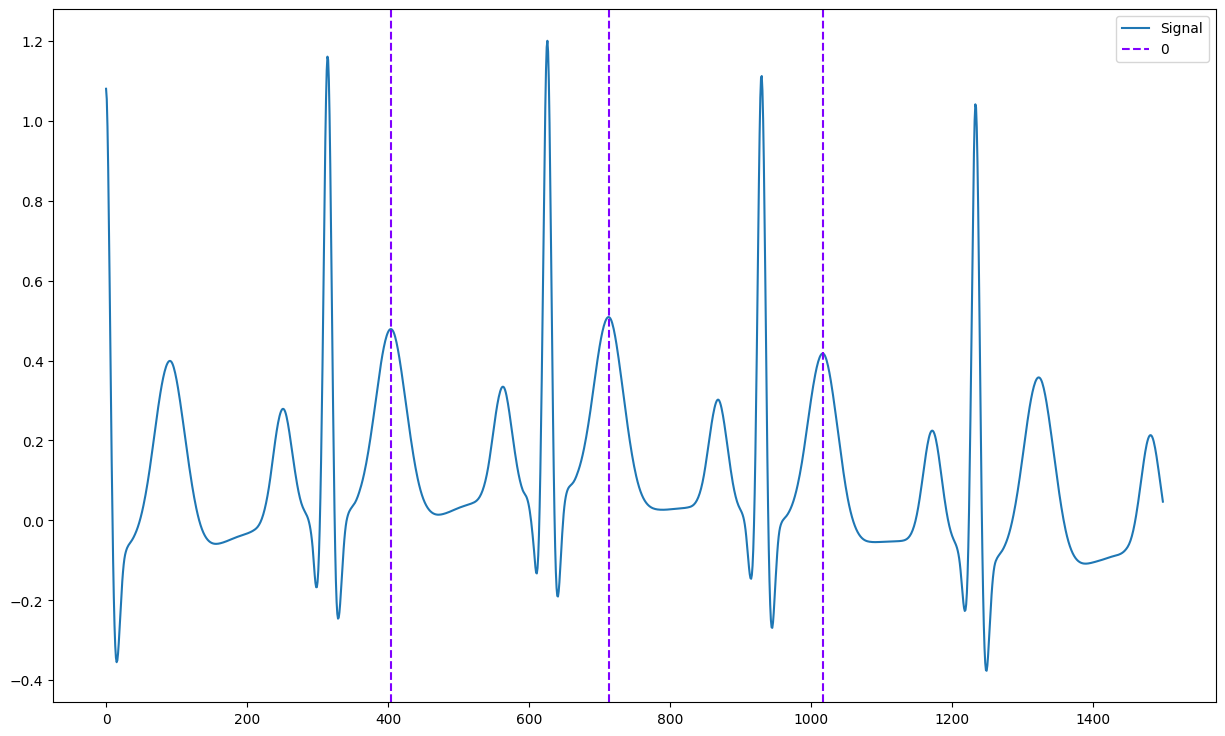

In [19]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       ], ecg_signal[:1500])

Simulate 12 lead / multilead